## 1. Mounting and extracting dataset from drive
- est exec time: 2 mins

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tarfile
import os

dataset_path = '/content/drive/MyDrive/'
tar_path = '/content/drive/MyDrive/isl-dataset.tar.gz'
extraction_path = '/content/'

os.makedirs(extraction_path, exist_ok=True)
with tarfile.open(tar_path, 'r:gz') as tar_ref:
  tar_ref.extractall(extraction_path)

## 2. Preprocessing the data
- Image resize (no normalization yet)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from PIL import Image
import random

In [6]:
base_dir='/content/ISL Finger Dataset'
# 256x256 colored images, already modified

In [7]:
img_size=100
batch_size=32

In [8]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [10]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 222600 images belonging to 35 classes.


In [11]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 55650 images belonging to 35 classes.


# CNN training

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (4,4), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (4,4), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 97, 97, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 256)               7

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5
6956/6956 [==============================] - 465s 66ms/step - loss: 0.1024 - accuracy: 0.9763 - val_loss: 1.8262 - val_accuracy: 0.7929
Epoch 2/5
6956/6956 [==============================] - 393s 57ms/step - loss: 0.0116 - accuracy: 0.9973 - val_loss: 2.3500 - val_accuracy: 0.7996
Epoch 3/5
6956/6956 [==============================] - 323s 46ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 2.9903 - val_accuracy: 0.7925
Epoch 4/5
6956/6956 [==============================] - 338s 49ms/step - loss: 0.0077 - accuracy: 0.9986 - val_loss: 4.0244 - val_accuracy: 0.8046
Epoch 5/5
6956/6956 [==============================] - 368s 53ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 4.7158 - val_accuracy: 0.7931


In [16]:
# Model Evaluation
print("Model Evaluation: ")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(val_accuracy)

Model Evaluation: 
1739/1739 [==============================] - 60s 35ms/step - loss: 4.7158 - accuracy: 0.7931
0.7930563688278198


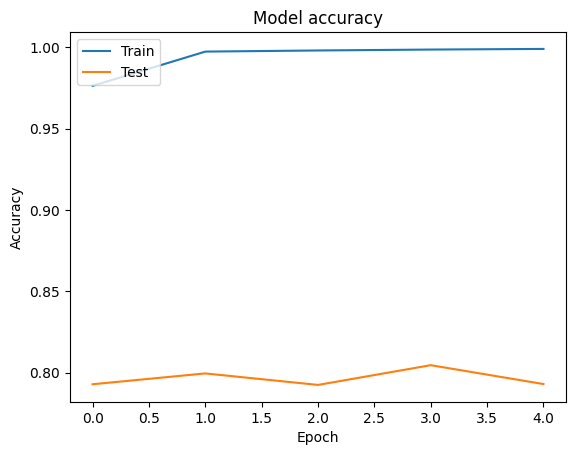

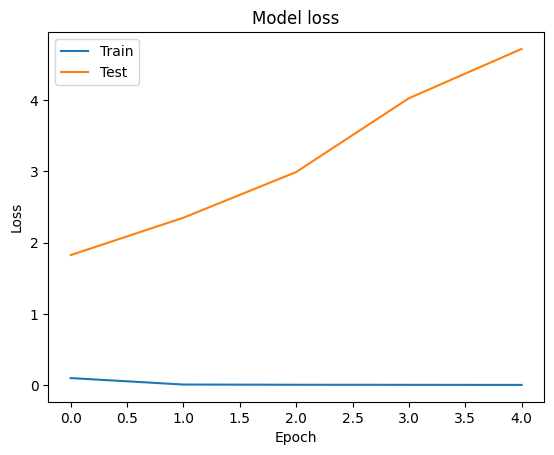

In [17]:
# Plot of training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()